In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.columns.to_list()

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Let's convert the columns to datetime formart wherever necessary

In [6]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [8]:
df['Date_of_Journey'].value_counts()

2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-09-06    495
2019-12-06    493
2019-09-05    484
2019-03-21    423
2019-05-15    405
2019-06-03    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-01-06    342
2019-03-06    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-09-03    302
2019-03-27    299
2019-05-24    286
2019-06-05    282
2019-01-05    277
2019-12-05    259
2019-01-04    257
2019-01-03    199
2019-03-15    162
2019-03-18    156
2019-12-03    142
2019-09-04    125
2019-03-04    110
2019-06-21    109
2019-06-18    105
2019-06-04    100
2019-04-27     94
2019-04-24     92
2019-03-05     90
2019-04-15     89
2019-04-21     82
2019-04-18     67
2019-12-04     63
Name: Date_of_Journey, dtype: int64

Let us split the date in Date_of_Journey in day and month, year is not required as all the years are the same.

In [9]:
# Extracting Day from Date_of_journey column
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [10]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [12]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
42h 45m      1
33h 20m      1
31h 30m      1
32h 20m      1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [13]:
# Duration
#Converting Hrs+Mins to only Mins
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#now lets convert this column into a numeric

df['Duration']=pd.to_numeric(df['Duration'])

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-01-14 22:20:00,2022-03-22 01:10:00,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-14 05:50:00,2022-01-14 13:15:00,445,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-01-14 09:25:00,2022-06-10 04:25:00,1140,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-01-14 18:05:00,2022-01-14 23:30:00,325,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-01-14 16:50:00,2022-01-14 21:35:00,285,1 stop,No info,13302,3,1


In [17]:
# Extracting Hours from Dep_Time column
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
df.drop("Dep_Time",axis=1,inplace=True)

In [19]:
# Extracting Arrival_Hour from Arrival_Time column
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
df.drop("Arrival_Time",axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
df.shape

(10683, 14)

In [22]:
df.columns.to_list()

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Hour',
 'Dep_Min',
 'Arrival_Hour',
 'Arrival_Min']

In [23]:
# Checking the value counts of every column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                              

In the Airline column, let us change Multiple carriers Premium economy to Multiple carriers, Jet Airways Business to Jet Airways, Vistara Premium economy to  Vistara. 

In the destination column let us change New Delhi to Delhi.

In Additional_Info column let us change No info to No Info and 1 Long layover/ 2 Long layover to Long layover.

In [24]:
df["Airline"]=df["Airline"].replace("Jet Airways Business","Jet Airways")

df['Airline']=df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

df["Airline"] = df["Airline"].replace("Vistara Premium economy","Vistara")

df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

df['Additional_Info'] = df['Additional_Info'].replace("No info", "No Info")

df['Additional_Info']=df['Additional_Info'].replace(["1 Long layover","2 Long layover"],"Long layover")

Let us recheck if the values in the changed columns have been replaced.

In [25]:
val_count = ["Airline","Destination","Additional_Info"]
for i in val_count:
    print(df[i].value_counts())
    print("\n")

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64




In [26]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

In [27]:
print("The mode of Route is:",df["Route"].mode())
print("The mode of Total_Stops is:",df["Total_Stops"].mode())

The mode of Route is: 0    DEL → BOM → COK
dtype: object
The mode of Total_Stops is: 0    1 stop
dtype: object


In [28]:
# Filling the missing values in "Route" withs its mode
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

# Filling the mising values in "Total_Stops" by its mode
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [29]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

In [30]:
df.describe()

,Duration,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,643.093232,9087.064121,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630
std,507.862001,4611.359167,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036
min,5.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


# Univariate Analysis

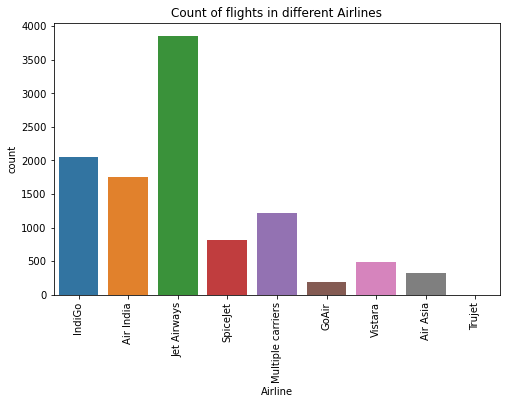

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(df["Airline"])
plt.title("Count of flights in different Airlines")
plt.xticks(rotation=90)
plt.show()

Jet Airways flights has high counts whereas Trujet and GoAir has the least counts.

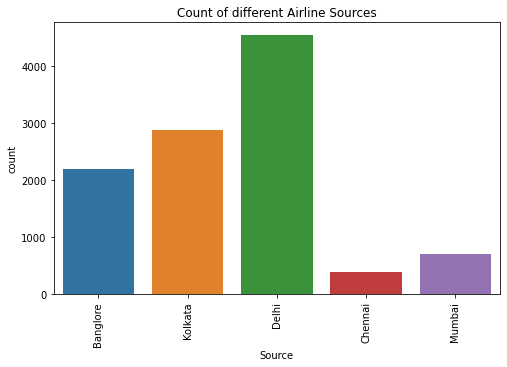

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(df["Source"])
plt.title("Count of different Airline Sources")
plt.xticks(rotation=90)
plt.show()

The Journey of many flights begin from Delhi and least from Chennai

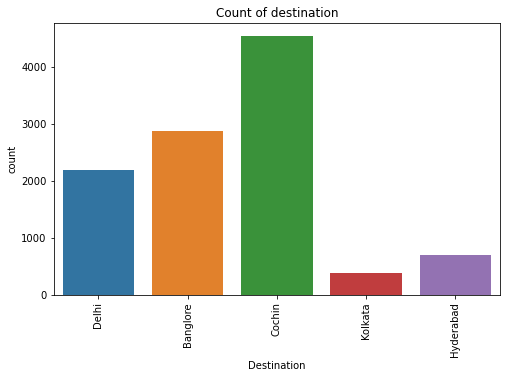

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(df["Destination"])
plt.title("Count of destination")
plt.xticks(rotation=90)
plt.show()

The destination of most of the Flights is Cochin and least is Kolkata

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


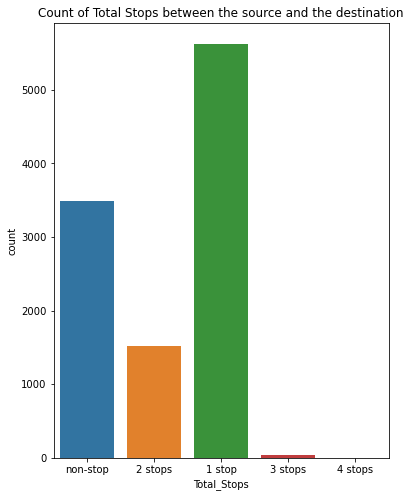

In [38]:
print(df['Total_Stops'].value_counts())
plt.figure(figsize=(6,8))
sns.countplot(df["Total_Stops"])
plt.title("Count of Total Stops between the source and the destination")
plt.show()

Most of the flights have 1 stop and very few flights have 4 stops between the source and destination.

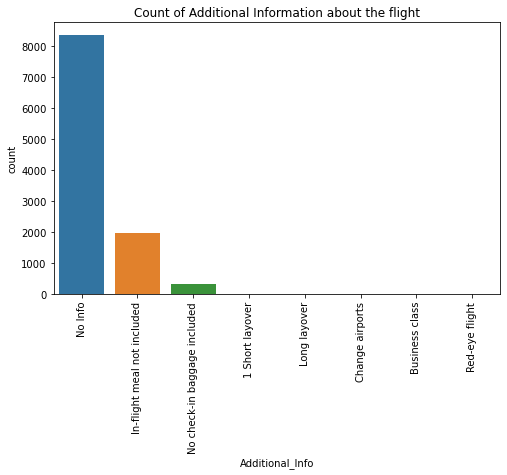

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(df["Additional_Info"])
plt.title("Count of Additional Information about the flight")
plt.xticks(rotation=90)
plt.show()

Most of the flights have no additional information.

In [72]:
numerical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


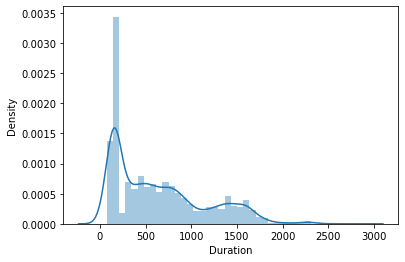

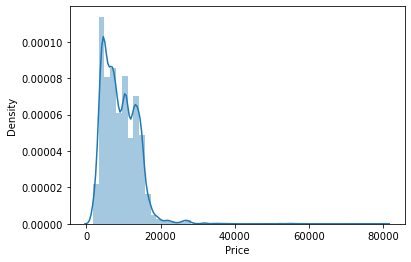

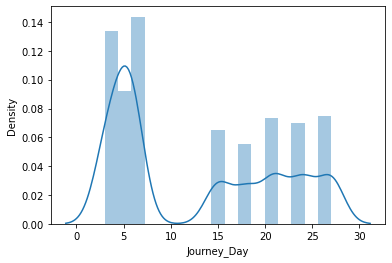

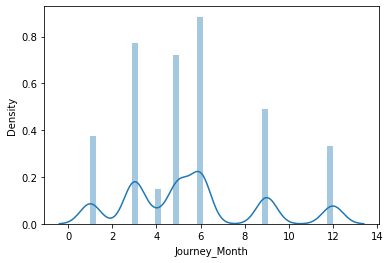

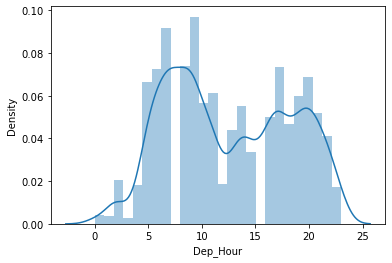

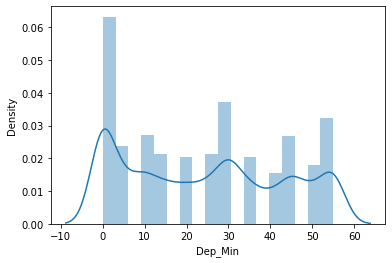

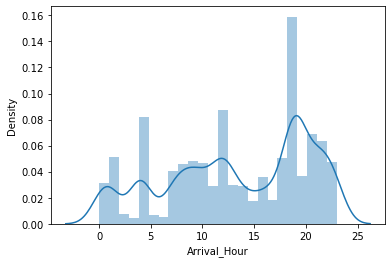

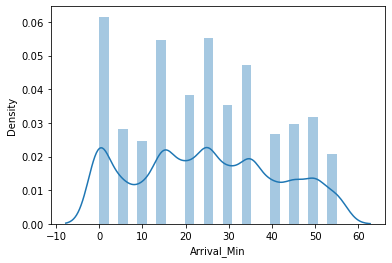

In [45]:
for i in numerical_columns:
    sns.distplot(df[i])
    plt.show()

# Bivariate Analysis

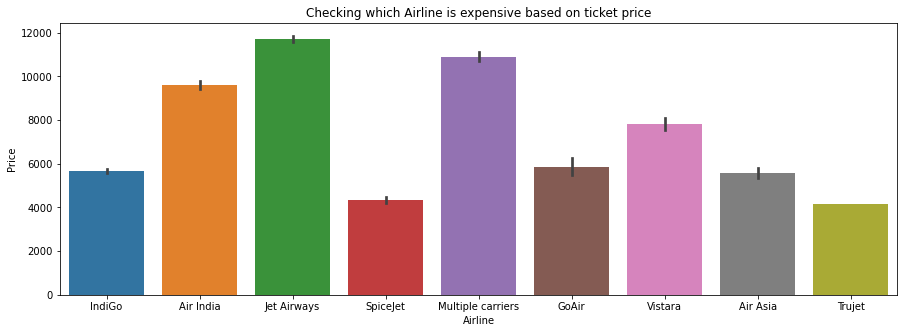

In [46]:
plt.figure(figsize=(15,5))
sns.barplot(df['Airline'],df["Price"],data=df)
plt.title("Checking which Airline is expensive based on ticket price")
plt.show()

The above plot shows that Jet Airways is most expensive Airline followed by Multiple carriers followed by Air India.\
Trujet and Spicejet have low ticket prices compared to the other Airlines.

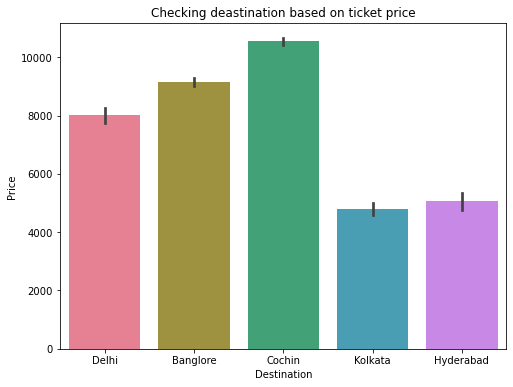

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(df["Destination"],df["Price"],data=df,palette="husl" )
plt.title("Checking deastination based on ticket price")
plt.show()

The ticket price is the highest when the destination is Cochin

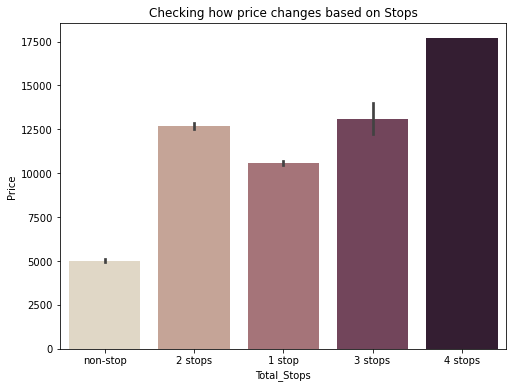

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(df["Total_Stops"],df["Price"],data=df,palette="ch:.28")
plt.title("Checking how price changes based on Stops")
plt.show()

We can see that when there are 4 stops the price of the ticket is the highest and when there are no stops the price the price of the ticket is the least

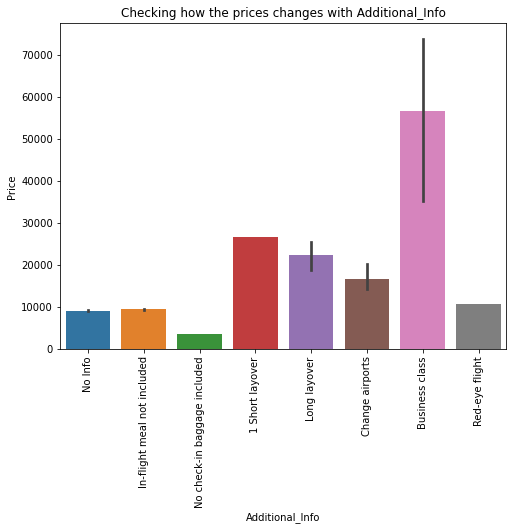

In [49]:
plt.figure(figsize=(8,6))
sns.barplot(df["Additional_Info"],df["Price"],data=df)
plt.title("Checking how the prices changes with Additional_Info")
plt.xticks(rotation=90)
plt.show()

1. The price of Business class tickets is the highest.
2. When there is no chek-in baggage the price of the ticket is the least.

<AxesSubplot:xlabel='Journey_Day', ylabel='Price'>

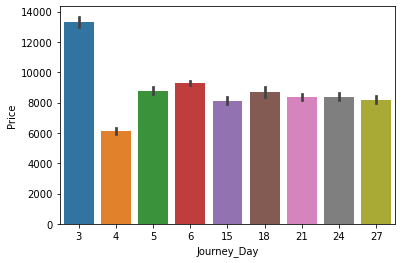

In [52]:
sns.barplot(x='Journey_Day',y='Price',data=df)

We can see that when the Journey Date is 3rd the price of the ticket is the highest and when the journey date is 4th the price of the ticket is the least

<AxesSubplot:xlabel='Journey_Month', ylabel='Price'>

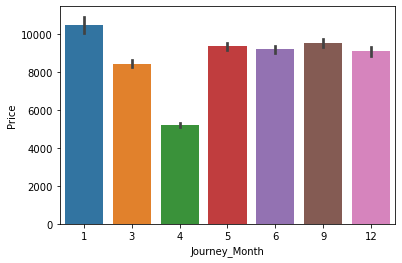

In [55]:
sns.barplot(x='Journey_Month',y='Price',data=df)

The price of the ticket is the highest when the month of journey is January and the least when the month of journey is April

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

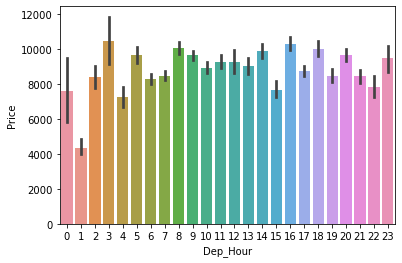

In [58]:
sns.barplot(x='Dep_Hour',y='Price',data=df)

As we can see that Departure hour doesn't impact the ticket price much

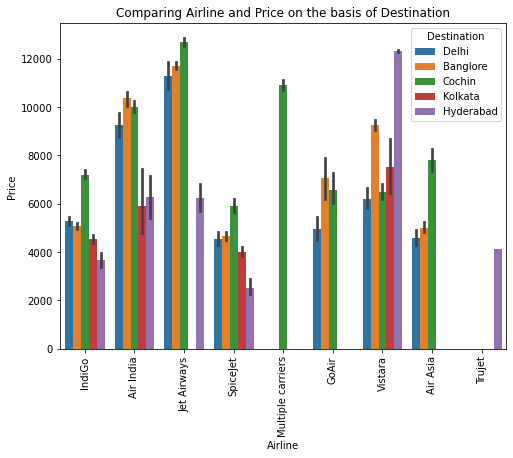

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Airline'],y=df['Price'],hue=df["Destination"])
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=90)
plt.show()

We can observe the following from the above graph:
1. Jet Airways flights with the destination as Delhi have the highest ticket price.
2. Indigo flights with the destination as Cochin has the highest price.
3. Air India flights with the destination as Bangalore have the highest ticket price.
4. SpiceJet ticket price is the highest when the destination is Cochin
5. GoAir ticket prices are almost he same when the destination is Cochin/Banglore
6. Vistara ticket prices is the highest when the destination is Hyderabad
7. Air Asia ticket price is the highest when the destination is Cochin


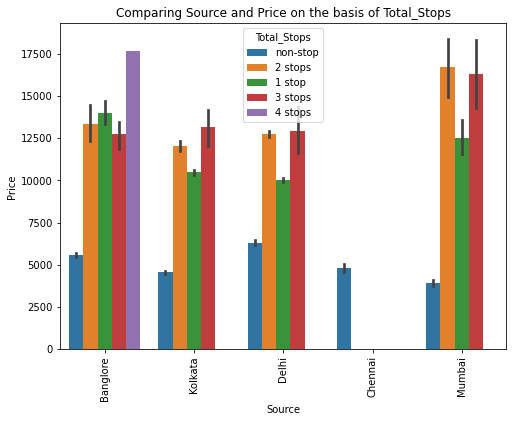

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Source'],y=df['Price'],hue=df["Total_Stops"])
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=90)
plt.show()

We can observe the following from the above gaph:
1. The flights with 4 stops and the source as Bangalore has the highest ticket price.
2. Only non-stop flights start from Chennai.
3. The price of tickets is highest when there are 2 stops are source of the flight is from Mumbai.

# Multivariate Analysis

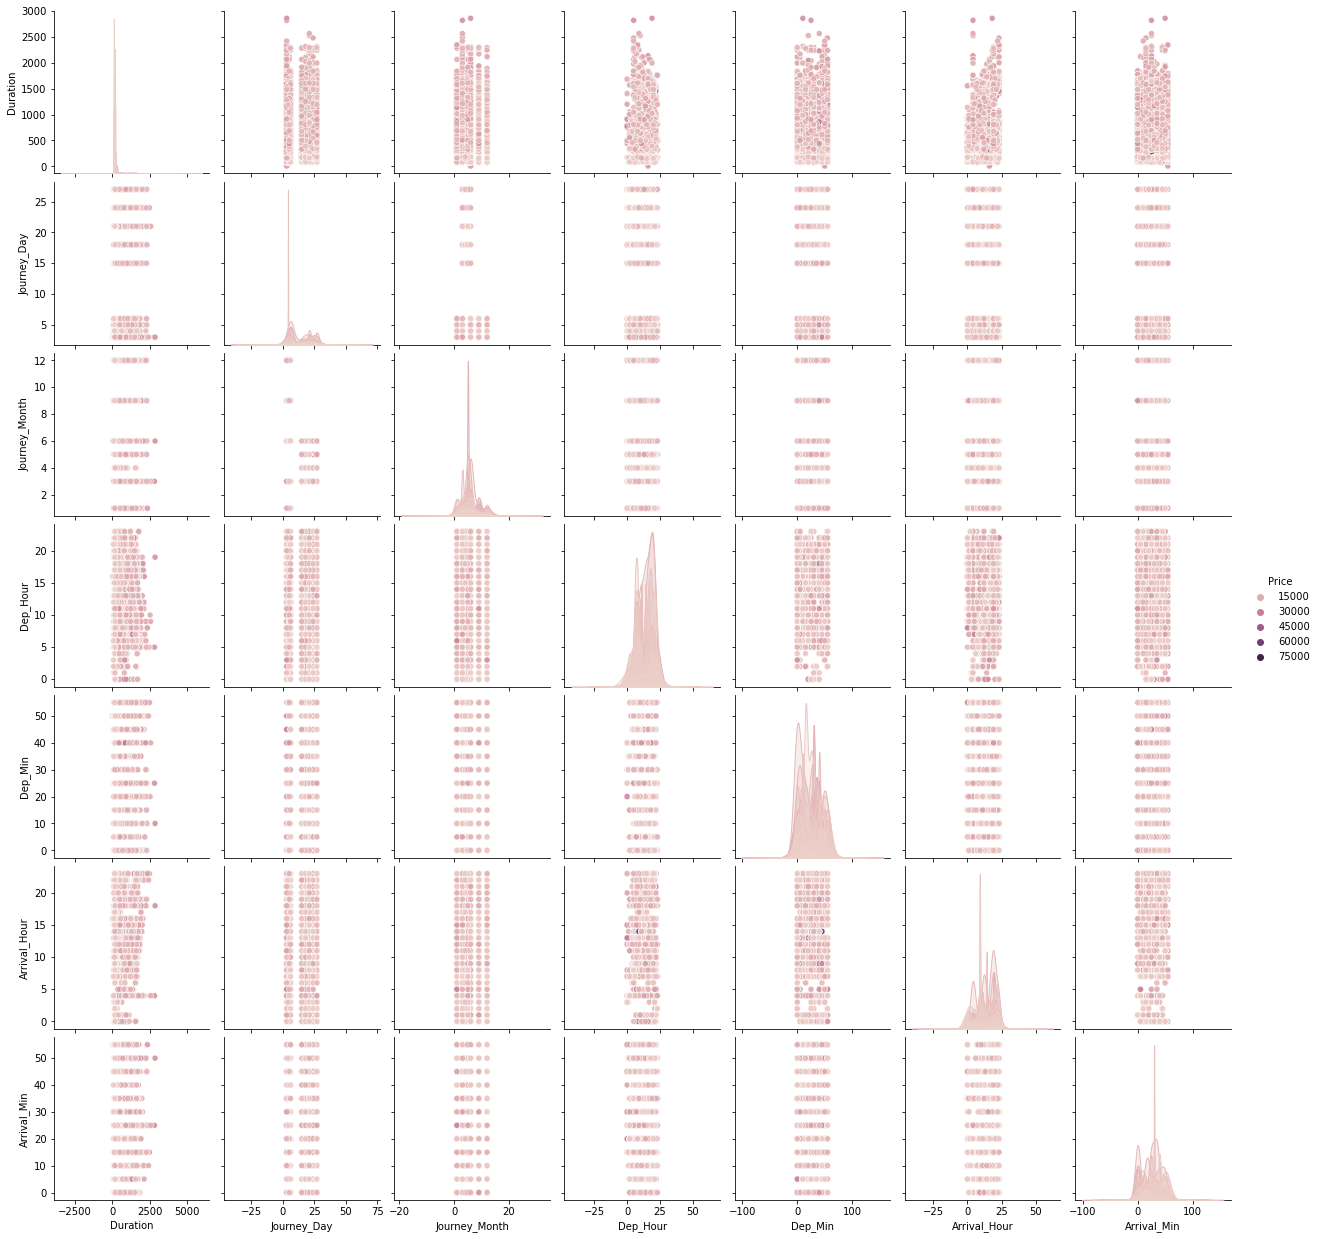

In [68]:
sns.pairplot(df,hue="Price")
plt.show()

# Outliers

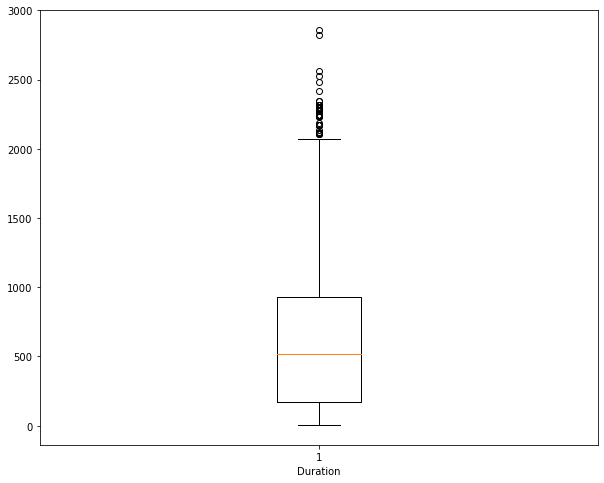

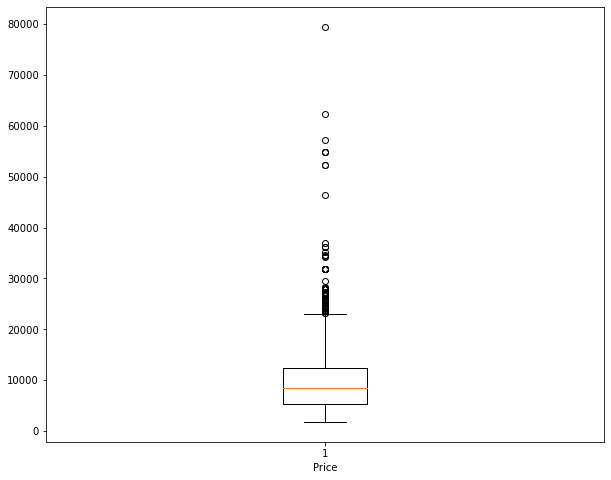

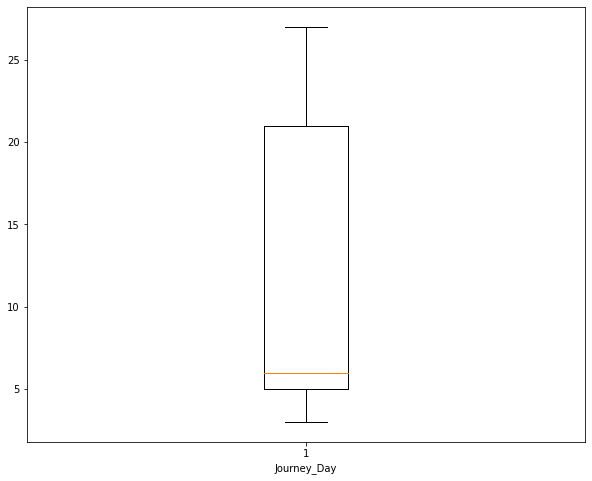

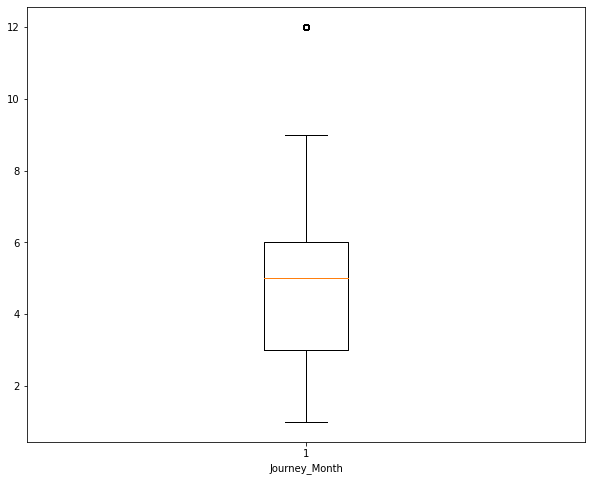

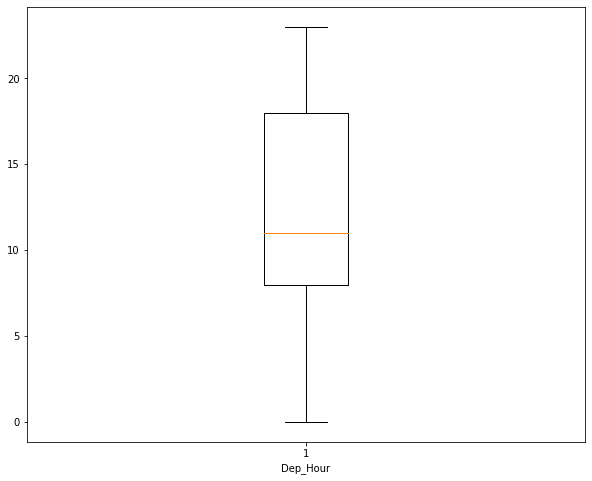

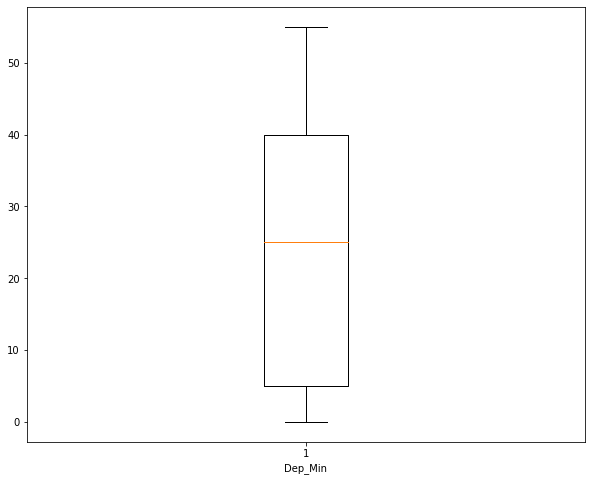

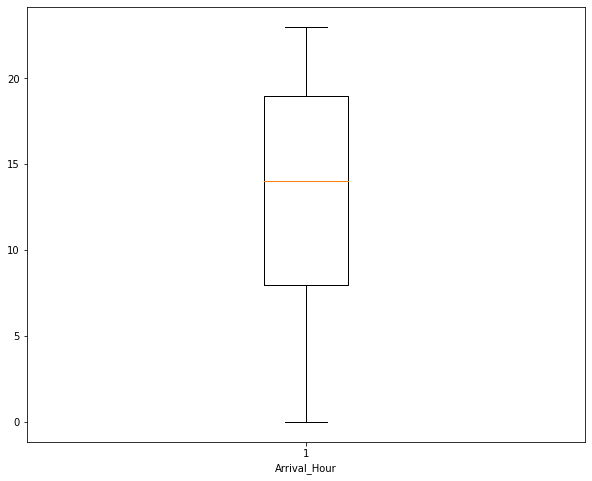

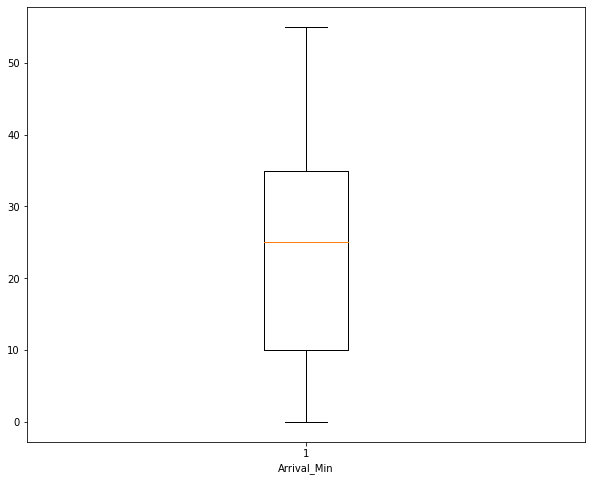

In [79]:
for i in numerical_columns:
    figsize=plt.figure(figsize=(10,8))
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

From the above box plots, the columns Duration and Journey_Month have outliers.

# Zscore

In [80]:
from scipy.stats import zscore
# Features containing outliers
features = df[["Duration","Journey_Month"]]
z = np.abs(zscore(features))
z

array([[0.93158255, 0.84850298],
       [0.39007152, 1.5179928 ],
       [0.97847452, 1.15996647],
       ...,
       [0.91189124, 0.51375808],
       [0.95127386, 1.5179928 ],
       [0.28176932, 1.15996647]])

In [81]:
new_df = df[(z<3).all(axis=1)]
new_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No Info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No Info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No Info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1 stop,No Info,13302,3,1,16,50,21,35


In [82]:
df.shape, new_df.shape

((10683, 14), (10617, 14))

In [84]:
data_loss = (10683-10617)/10683*100
data_loss

0.6178039876439202

We have lost 0.61%(66 rows) after removing the outliers.

# Skewness

In [85]:
new_df.skew()

Duration         0.774266
Price            1.824502
Journey_Day      0.367029
Journey_Month    0.628224
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

In [86]:
new_df['Duration'] = np.log1p(new_df['Duration'])
new_df['Journey_Month'] = np.log1p(new_df['Journey_Month'])

In [87]:
new_df.skew()

Duration        -0.178335
Price            1.824502
Journey_Day      0.367029
Journey_Month   -0.533689
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

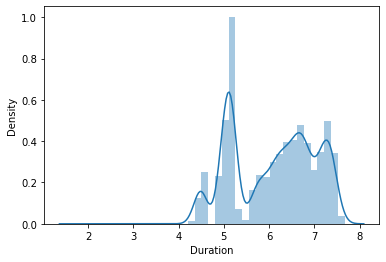

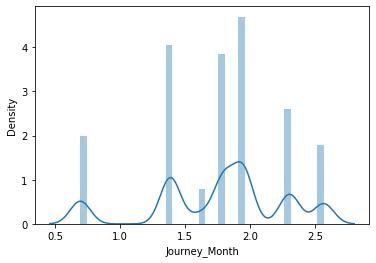

In [89]:
skew = new_df[['Duration','Journey_Month']]
for i in skew:
    sns.distplot(new_df[i])
    plt.show()

# Label Encoding

In [91]:
categorical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [94]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df[categorical_columns]=new_df[categorical_columns].apply(lbl.fit_transform)
new_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,5.141664,4,5,3897,24,1.386294,22,20,1,10
1,1,3,0,84,6.100319,1,5,7662,5,0.693147,5,50,13,15
2,4,2,1,118,7.039660,1,5,13882,6,2.302585,9,25,4,25
3,3,3,0,91,5.786897,0,5,6218,5,2.564949,18,5,23,30
4,3,0,2,29,5.655992,0,5,13302,3,0.693147,16,50,21,35


# Correlation

In [95]:
corr = new_df.corr()
corr

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013641,0.055391,0.021921,-0.077818,-0.010497,-0.056234,0.024773,0.025366,0.005402,-0.028238,-0.070340,-0.005868,-0.087465
Source,-0.013641,1.000000,-0.434677,0.404009,0.122739,-0.225922,-0.034128,0.016718,0.007158,0.062011,0.059469,-0.055929,0.026144,0.021640
Destination,0.055391,-0.434677,1.000000,-0.230755,-0.509154,0.510659,0.115602,-0.263334,0.007309,-0.061873,-0.088810,0.097052,-0.058190,0.006954
Route,0.021921,0.404009,-0.230755,1.000000,0.368475,-0.439372,0.002232,0.163635,0.096042,0.076196,-0.070005,-0.066420,0.011514,-0.174071
Duration,-0.077818,0.122739,-0.509154,0.368475,1.000000,-0.809980,-0.251284,0.605786,-0.042848,0.061807,-0.001689,-0.033797,0.056730,-0.125315
Total_Stops,-0.010497,-0.225922,0.510659,-0.439372,-0.809980,1.000000,0.234493,-0.572413,0.043711,-0.048791,0.038512,0.049105,-0.095213,0.176915
Additional_Info,-0.056234,-0.034128,0.115602,0.002232,-0.251284,0.234493,1.000000,-0.114590,-0.012301,-0.025319,-0.052282,0.008984,-0.005902,0.044179
Price,0.024773,0.016718,-0.263334,0.163635,0.605786,-0.572413,-0.114590,1.000000,-0.163765,-0.013511,0.011430,-0.025585,0.021107,-0.088909
Journey_Day,0.025366,0.007158,0.007309,0.096042,-0.042848,0.043711,-0.012301,-0.163765,1.000000,-0.097582,-0.002628,-0.017421,-0.001501,-0.021901
Journey_Month,0.005402,0.062011,-0.061873,0.076196,0.061807,-0.048791,-0.025319,-0.013511,-0.097582,1.000000,0.020587,-0.005264,-0.005743,-0.031453


<AxesSubplot:>

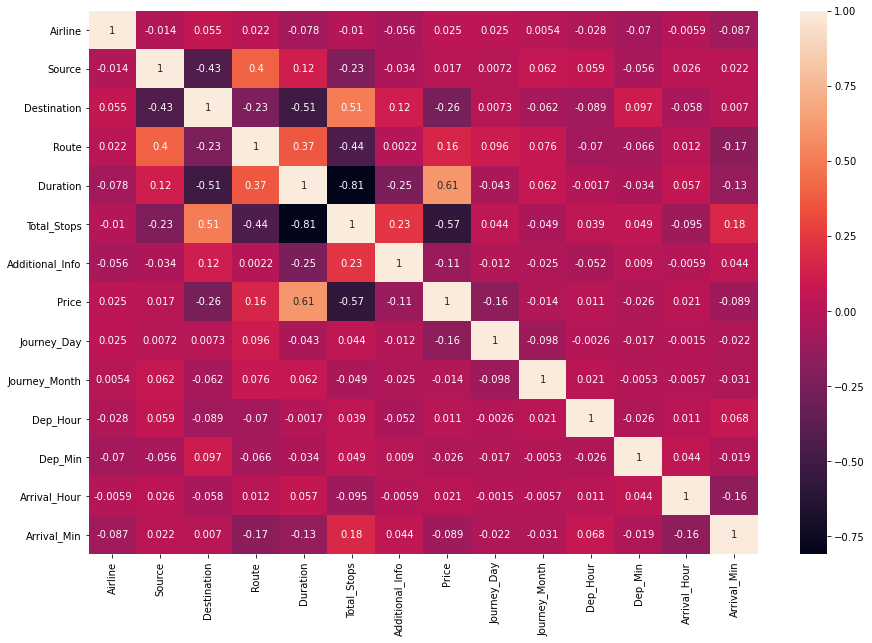

In [98]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

1. The feature Duration is highly positively correlated with the label.
2. The feature Total_Stops is highly Negatively correlated with the label.
3. The features Duration, Total_Stops and Destination are highly negatively correlated with each other.This may lead to multicollinearity problem, we will check vif values to avoid this.

In [102]:
x = new_df.drop("Price",axis=1)
y = new_df["Price"]

# Standard Scaler

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.345488,-1.655042,0.812707,-1.544003,-1.058285,1.402360,0.424603,1.286176,-0.754967,1.649475,-0.235894,-1.794784,-0.889208
1,-1.464134,0.888124,-1.157048,0.254498,0.007344,-0.253797,0.424603,-0.873920,-2.141814,-1.312186,1.362715,-0.046050,-0.586465
2,0.213836,0.040402,-0.172170,1.180998,1.051504,-0.253797,0.424603,-0.760231,1.078344,-0.615325,0.030541,-1.357601,0.019019
3,-0.345488,0.888124,-1.157048,0.445248,-0.341051,-0.805850,0.424603,-0.873920,1.603281,0.952614,-1.035199,1.411228,0.321762
4,-0.345488,-1.655042,0.812707,-1.244253,-0.486564,-0.805850,0.424603,-1.101299,-2.141814,0.604183,1.362715,1.119772,0.624504


# Checking Multicolinearity

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.043901,Airline
1,1.529957,Source
2,1.773160,Destination
3,1.561303,Route
4,3.307864,Duration
5,3.393121,Total_Stops
6,1.103963,Additional_Info
7,1.035535,Journey_Day
8,1.022210,Journey_Month
9,1.031697,Dep_Hour


There is no multicolinearity problem

# Model Building

In [106]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [107]:
from sklearn.ensemble import RandomForestRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print("Maximum r2_score is ",maxAccu,"at random_state",maxRS) 

Maximum r2_score is  0.9162986139359917 at random_state 0


In [108]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=maxRS)

In [109]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Random Forest Regressor

In [110]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
print("R2_score:",r2_score(y_test,predRFR))
print("MAE:",metrics.mean_absolute_error(y_test,predRFR))
print("MSE:",metrics.mean_squared_error(y_test,predRFR))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_score: 0.8934621988002731
MAE: 691.9220978723881
MSE: 2208444.688386039
RSME: 1486.0836747592778


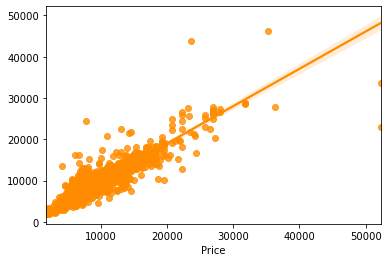

In [111]:
sns.regplot(y_test,predRFR,color='darkorange')
plt.show()

# Decision Tree Regressor

In [112]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR = DTR.predict(x_test)
print("R2_score:",r2_score(y_test,predDTR))
print("MAE:",metrics.mean_absolute_error(y_test,predDTR))
print("MSE:",metrics.mean_squared_error(y_test,predDTR))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_score: 0.8414954972698185
MAE: 764.7572190834903
MSE: 3285673.4717426933
RSME: 1812.6426762444642


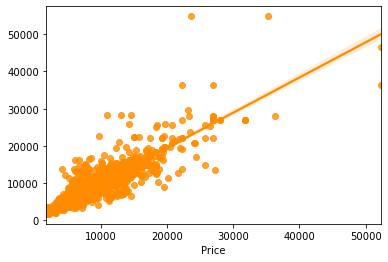

In [113]:
sns.regplot(y_test,predDTR,color='darkorange')
plt.show()

# Gradient Boosting Regressor


In [114]:
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print("R2_score:",r2_score(y_test,predGB))
print("MAE:",metrics.mean_absolute_error(y_test,predGB))
print("MSE:",metrics.mean_squared_error(y_test,predGB))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_score: 0.820503075372821
MAE: 1263.255162848369
MSE: 3720829.8398365923
RSME: 1928.9452661588384


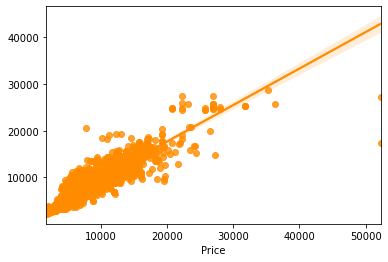

In [115]:
sns.regplot(y_test,predGB,color='darkorange')
plt.show()

# Bagging Regressor


In [116]:
BR = BaggingRegressor()
BR.fit(x_train,y_train)
predBR = BR.predict(x_test)
print("R2_score:",r2_score(y_test,predBR))
print("MAE:",metrics.mean_absolute_error(y_test,predBR))
print("MSE:",metrics.mean_squared_error(y_test,predBR))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_score: 0.8723779521093884
MAE: 738.7057027770305
MSE: 2645504.5121176406
RSME: 1626.500695394146


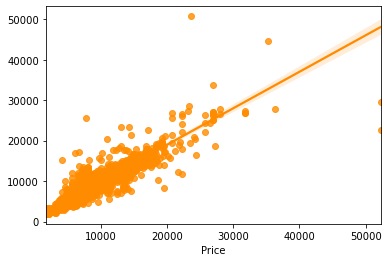

In [117]:
sns.regplot(y_test,predBR,color='darkorange')
plt.show()

# XGB Regressor

In [118]:
from xgboost import XGBRegressor as xgb

XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)
predXGB = XGB.predict(x_test)
print("R2_score:",r2_score(y_test,predXGB))
print("MAE:",metrics.mean_absolute_error(y_test,predXGB))
print("MSE:",metrics.mean_squared_error(y_test,predXGB))
print("RSME:",np.sqrt(metrics.mean_squared_error(y_test,predXGB)))

R2_score: 0.9120005978855135
MAE: 762.0725667777483
MSE: 1824158.2799005907
RSME: 1350.6140380954844


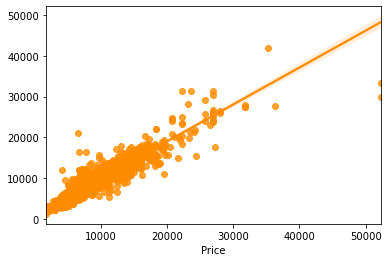

In [119]:
sns.regplot(y_test,predXGB,color='darkorange')
plt.show()

# Cross Validation Score

In [120]:
from sklearn.model_selection import cross_val_score

In [123]:
print("Cross validation score using Random Forest",cross_val_score(RFR,x,y,cv=5).mean())

Cross validation score using Random Forest 0.8753209594059623


In [124]:
print("Cross validation score using Decision Tree",cross_val_score(DTR,x,y,cv=5).mean())

Cross validation score using Decision Tree 0.7800493287625407


In [125]:
print("Cross validation score using Gradient Boosting",cross_val_score(GB,x,y,cv=5).mean())

Cross validation score using Gradient Boosting 0.804420580428548


In [126]:
print("Cross validation score using Bagging Regressor",cross_val_score(BR,x,y,cv=5).mean())

Cross validation score using Bagging Regressor 0.8671925387925518


In [127]:
print("Cross validation score using XGB Regressor",cross_val_score(XGB,x,y,cv=5).mean())

Cross validation score using XGB Regressor 0.8916851132072153


### Best Model - XGB Regressor

# Hyperparameter Tuning

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
parameters = {'n_estimator':[50,100,200,400],
            'gamma':np.arange(0,0.2,0.1),
            'max_depth':[4,6,8,10],
            'n_jobs':[-2,-1,1]}

In [130]:
GCV = GridSearchCV(xgb(),parameters,cv=5)

In [131]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [132]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimator': 50, 'n_jobs': -2}

In [134]:
flight_pred = xgb(gamma=0.0,max_depth=6,n_estimator=50,n_jobs=-2)
flight_pred.fit(x_train,y_train)
pred = flight_pred.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 91.20005978855134
RMSE value: 1350.6140380954844
MAE: 762.0725667777483
MSE: 1824158.2799005907


# Saving the model


In [135]:
import pickle
filename = "flight_prediction.pkl"
pickle.dump(flight_pred,open(filename,'wb'))

# Prediction Results

In [138]:
a = np.array(y_test)
predicted = np.array(flight_pred.predict(x_test))
new_df = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
new_df.head()

,Original,Predicted
0,17024,16208.969727
1,7817,9413.871094
2,13376,13726.608398
3,14486,10832.764648
4,11560,10564.657227


# Test Data

In [139]:
test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [140]:
test_df.shape

(2671, 10)

In [141]:
test_df.columns.tolist()

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [142]:
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

In [143]:
test_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [144]:
# Extracting Day from Date_of_journey column
test_df['Journey_Day'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_journey column
test_df['Journey_Month'] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [145]:
# Dropping Date_of_journey column
test_df.drop("Date_of_Journey",axis=1,inplace=True)

In [ ]:
# Duration
test_df['Duration']=test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#now lets convert this column into a numeric
test_df['Duration']=pd.to_numeric(test_df['Duration'])

In [148]:
# Extracting Hours from Dep_Time column
test_df['Dep_Hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
test_df['Dep_Min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

In [149]:
test_df.drop("Dep_Time",axis=1,inplace=True)

In [150]:
# Extracting Arrival_Hour from Arrival_Time column
test_df['Arrival_Hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour

# Extracting Arrival_Min from Arrival_Time column
test_df['Arrival_Min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute

# Dropping Arruval_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)

In [151]:
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


In [152]:
test_df.shape

(2671, 13)

In [153]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
test_df["Airline"] = test_df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
test_df["Additional_Info"] = test_df["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

In [154]:
val_count = ["Airline","Destination", "Additional_Info"]

for i in val_count:
    print(test_df[i].value_counts())

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
No Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
Long layover                       1
Name: Additional_Info, dtype: int64


In [155]:
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

In [156]:
test_df.describe()

,Duration,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.00000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,639.74167,12.026956,5.607263,12.603519,24.891426,13.585174,24.558218
std,502.18693,8.564408,3.042952,5.686673,19.086522,7.040396,16.775436
min,5.00000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,175.00000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.00000,6.000000,5.000000,12.000000,25.000000,15.000000,25.000000
75%,915.00000,21.000000,6.000000,18.000000,45.000000,19.000000,35.000000
max,2440.00000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


In [157]:
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [158]:
numerical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Duration', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


# Outliers

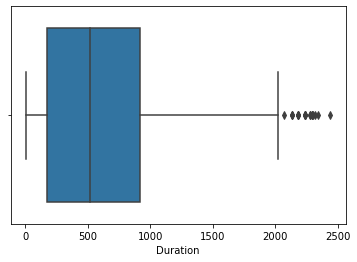

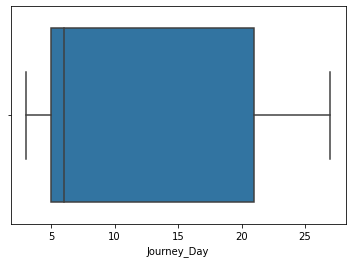

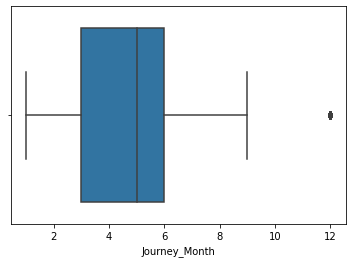

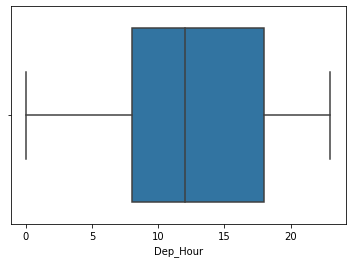

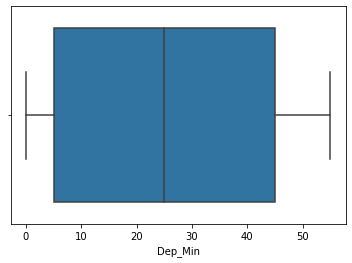

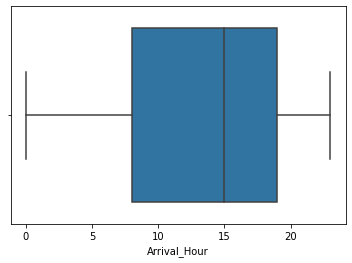

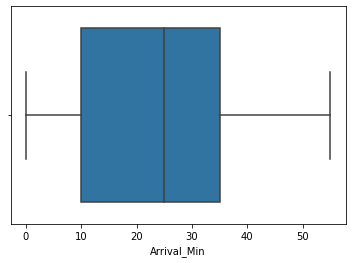

In [159]:
for i in numerical_col:
    sns.boxplot(test_df[i])
    plt.show()

We can notice outliers in Journey_Month and Duration, lets remove outliers using zscore method.

# Zscore

In [160]:
features = test_df[["Duration","Journey_Month"]]
from scipy.stats import zscore
z = np.abs(zscore(features))
z

array([[0.03038946, 0.12908857],
       [0.79615079, 2.10122721],
       [1.56397015, 0.1996012 ],
       ...,
       [0.48744299, 0.12908857],
       [0.5482219 , 0.12908857],
       [0.43868042, 0.12908857]])

In [162]:
new_test_df = test_df[(z<3).all(axis=1)]
new_test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No Info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No Info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No Info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,24,6,23,55,2,45


In [163]:
test_df.shape, new_test_df.shape

((2671, 13), (2653, 13))

In [164]:
loss = (2671-2653)/2671*100
loss

0.6739049045301385

# Skewness

In [165]:
new_test_df.skew()

Duration         0.809826
Journey_Day      0.475210
Journey_Month    0.591565
Dep_Hour         0.083357
Dep_Min          0.132681
Arrival_Hour    -0.432551
Arrival_Min      0.110111
dtype: float64

In [166]:
new_test_df["Duration"]=np.log1p(new_test_df["Duration"])
new_test_df["Journey_Month"]=np.log1p(new_test_df["Journey_Month"])

In [167]:
new_test_df.skew()

Duration        -0.229080
Journey_Day      0.475210
Journey_Month   -0.541053
Dep_Hour         0.083357
Dep_Min          0.132681
Arrival_Hour    -0.432551
Arrival_Min      0.110111
dtype: float64

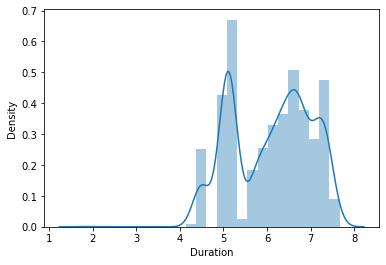

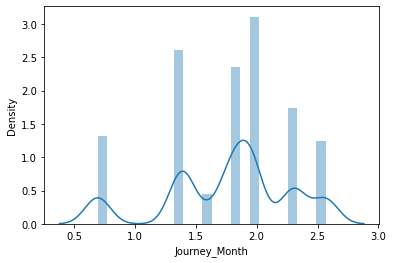

In [170]:
skew = new_test_df[['Duration','Journey_Month']]
for i in skew:
    sns.distplot(new_test_df[i])
    plt.show()

# Label Encoding

In [171]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_test_df[categorical_col]= new_test_df[categorical_col].apply(LE.fit_transform)
new_test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,6.486161,0,4,6,1.945910,17,30,4,25
1,3,3,0,65,5.484797,0,4,5,2.564949,6,20,10,20
2,4,2,1,76,7.262629,0,2,21,1.791759,19,15,19,0
3,5,2,1,76,6.660575,0,4,21,1.791759,8,0,21,0
4,0,0,2,16,5.141664,4,4,24,1.945910,23,55,2,45


In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_test_df = pd.DataFrame(scaler.fit_transform(new_test_df),columns=new_test_df.columns)
new_test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,0.438880,-0.791072,0.393727,-0.706193,0.344970,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.681421,-0.791072,0.393727,-0.823069,1.565339,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,1.307572,-0.791072,-2.166466,1.046954,0.041078,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,0.634010,-0.791072,0.393727,1.046954,0.041078,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,-1.065309,1.429790,0.393727,1.397583,0.344970,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,1.315390,-0.791072,0.393727,-0.706193,0.344970,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,-1.168021,1.429790,0.393727,1.748212,-0.758252,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.125818,-0.791072,0.393727,-1.056822,0.344970,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,0.812389,-0.791072,0.393727,-1.056822,0.344970,-1.524934,-1.302277,0.774190,-0.569955


# Prediction Result

In [174]:
Predicted_Price = flight_pred.predict(new_test_df)
Predicted_Price

array([13990.69  ,  4431.118 , 12846.833 , ..., 16631.877 , 13210.868 ,
        7801.4995], dtype=float32)

In [175]:
Prediction = pd.DataFrame()
Prediction['Price'] = Predicted_Price
Prediction

,Price
0,13990.690430
1,4431.118164
2,12846.833008
3,10511.018555
4,3230.253174
...,...
2648,8735.728516
2649,5129.979980
2650,16631.876953
2651,13210.868164


In [176]:
Prediction.to_csv("Predicted_Flight_Price_Data.csv",index=False)

#### We have saved the Prediction price in a CSV file.